In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv("googleplaystore.csv")

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Data Cleaning

In [9]:
x=df.Rating.mean()
df.Rating.fillna(x,inplace=True)

In [10]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [11]:
print(df[df.Rating>5])

                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN  


In [12]:
df.drop([10472],inplace=True)

In [13]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [14]:
df.Rating.max()

5.0

In [15]:
df.Installs

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10840, dtype: object

In [16]:
# Converting installs from string to floating point
df["Installs"] = df.Installs.apply(lambda x: str(x).replace("+",""))
df["Installs"] = df.Installs.apply(lambda x: str(x).replace(",",""))
df["Installs"] = df.Installs.apply(lambda x: float(x))
df.Installs.dtype

dtype('float64')

In [17]:
df.Installs

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10836        5000.0
10837         100.0
10838        1000.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 10840, dtype: float64

In [18]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [19]:
df["Price"] = df.Price.apply(lambda x: str(x).replace("$", ""))
df["Price"] = df.Price.apply(lambda x: float(x))
df.Price.dtype

dtype('float64')

In [20]:
df.Reviews.unique()
df["Reviews"] = df.Reviews.apply(lambda x: int(x))

In [21]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Data Visualization

Most Installed Apps

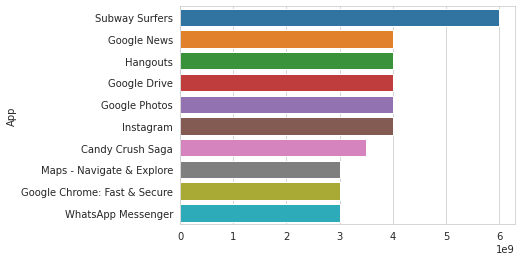

In [22]:
sns.set_style("whitegrid")
x=df.groupby("App").Installs.sum().sort_values(ascending=False).head(10)
sns.barplot(x.values,x.index)

Top paid Apps

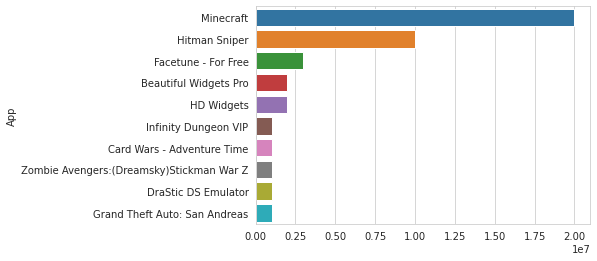

In [23]:
x=df[df["Type"]=="Paid"]
y=x.groupby("App").Installs.sum().sort_values(ascending=False).head(10)
sns.barplot(y.values,y.index)

Top Free Apps

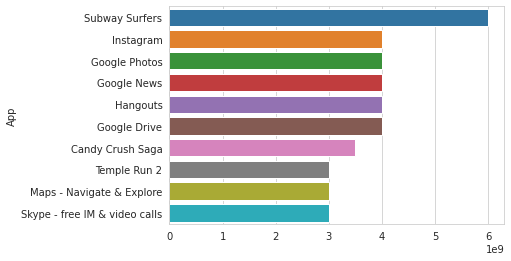

In [24]:
x=df[df["Type"]=="Free"]
y=x.groupby("App").Installs.sum().sort_values(ascending=False).head(10)
sns.barplot(y.values,y.index)

Type Pie Chart

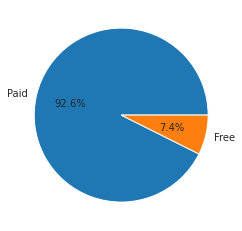

In [25]:
x=df.Type.value_counts()
label=["Paid","Free"]
plt.pie(x,labels=label,autopct="%1.1f%%")
plt.show()

Installs vs Rating

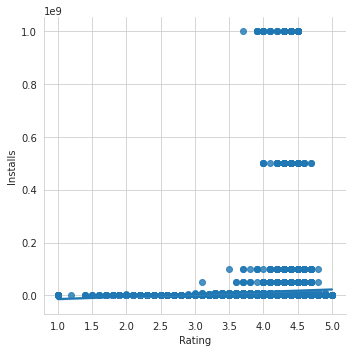

In [26]:
sns.lmplot(x="Rating",y="Installs",data=df)

Category Pie chart

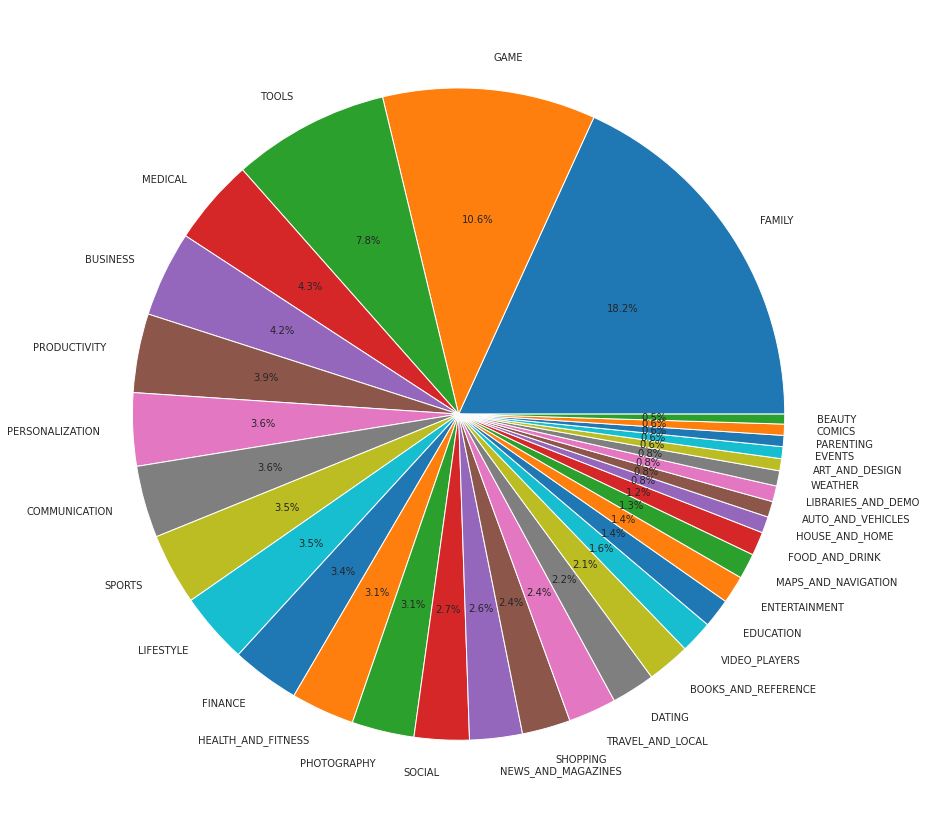

In [27]:
df.Category.unique()
x=df.Category.value_counts()
label = list(x.index)
plt.figure(figsize=(15,15))
plt.pie(x,labels=label,autopct="%1.1f%%")
plt.show()



Genres Count

<function matplotlib.pyplot.show>

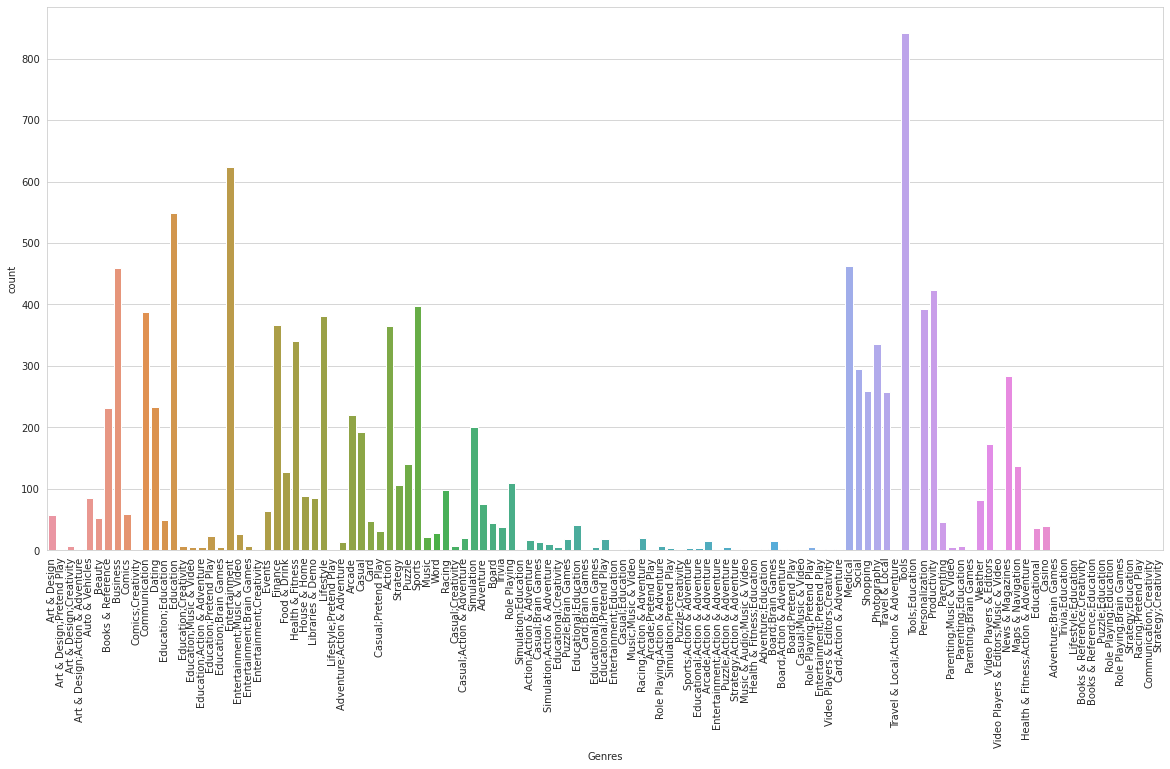

In [28]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x="Genres",data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show

Top Rated Category

In [29]:
df.groupby("Category").Rating.mean().sort_values(ascending = False)

Category
EDUCATION              4.387778
EVENTS                 4.363647
ART_AND_DESIGN         4.350462
BOOKS_AND_REFERENCE    4.311026
PERSONALIZATION        4.307603
GAME                   4.282506
PARENTING              4.282223
HEALTH_AND_FITNESS     4.266296
BEAUTY                 4.260882
SHOPPING               4.254052
SOCIAL                 4.248001
WEATHER                4.239675
SPORTS                 4.218404
PRODUCTIVITY           4.208287
HOUSE_AND_HOME         4.196819
FAMILY                 4.192394
PHOTOGRAPHY            4.192179
AUTO_AND_VEHICLES      4.190824
MEDICAL                4.190167
LIBRARIES_AND_DEMO     4.181962
FOOD_AND_DRINK         4.170709
COMMUNICATION          4.163842
COMICS                 4.156445
BUSINESS               4.145987
NEWS_AND_MAGAZINES     4.142993
FINANCE                4.139108
ENTERTAINMENT          4.126174
TRAVEL_AND_LOCAL       4.119716
LIFESTYLE              4.112427
VIDEO_PLAYERS          4.074858
TOOLS                  4.066280

Top Rated Genres

In [30]:
df.groupby("Genres").Rating.mean().sort_values(ascending = False)

Genres
Comics;Creativity                      4.800000
Board;Pretend Play                     4.800000
Health & Fitness;Education             4.700000
Puzzle;Education                       4.600000
Adventure;Brain Games                  4.600000
                                         ...   
Educational;Creativity                 3.960000
Educational                            3.915316
Art & Design;Pretend Play              3.900000
Health & Fitness;Action & Adventure    3.900000
Parenting;Brain Games                  3.800000
Name: Rating, Length: 119, dtype: float64

Least Rated Category

In [31]:
df.groupby("Category").Rating.mean().sort_values(ascending=True).head(10)

Category
DATING                 4.007864
MAPS_AND_NAVIGATION    4.065061
TOOLS                  4.066280
VIDEO_PLAYERS          4.074858
LIFESTYLE              4.112427
TRAVEL_AND_LOCAL       4.119716
ENTERTAINMENT          4.126174
FINANCE                4.139108
NEWS_AND_MAGAZINES     4.142993
BUSINESS               4.145987
Name: Rating, dtype: float64

Least Rated Genres

In [32]:
df.groupby("Genres").Rating.mean().sort_values(ascending=True).head(10)

Genres
Parenting;Brain Games                    3.800000
Health & Fitness;Action & Adventure      3.900000
Art & Design;Pretend Play                3.900000
Educational                              3.915316
Educational;Creativity                   3.960000
Video Players & Editors;Music & Video    4.000000
Entertainment;Pretend Play               4.000000
Lifestyle;Pretend Play                   4.000000
Dating                                   4.007864
Role Playing;Pretend Play                4.020000
Name: Rating, dtype: float64

Content Rating vs Rating

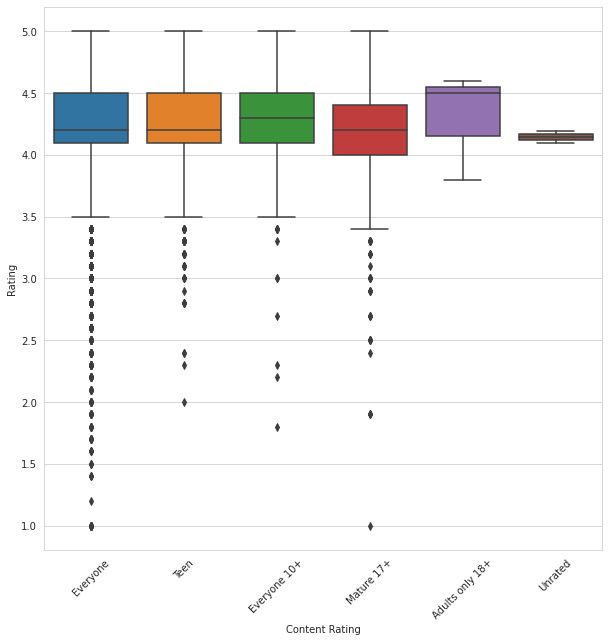

In [33]:
plt.figure(figsize=(10,10))
ax=sns.boxplot(x="Content Rating",y="Rating",data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

Categories with the most Installs

In [34]:
df.groupby("Category").Installs.sum().sort_values(ascending=False).head()

Category
GAME             3.508602e+10
COMMUNICATION    3.264728e+10
PRODUCTIVITY     1.417609e+10
SOCIAL           1.406987e+10
TOOLS            1.145277e+10
Name: Installs, dtype: float64

Predective Analytics

In [35]:
df.drop(labels=["Current Ver","Android Ver","App"],axis=1,inplace=True)

Convert categorical variables to numeric so that they can work smoothly with machine learning
algorithms.

In [36]:
category_list = df['Category'].unique().tolist()
category_list = ['cat_' + word for word in category_list]
df = pd.concat([df, pd.get_dummies(df['Category'], prefix = 'cat')], axis = 1)

In [37]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,...,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
0,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",...,0,0,0,0,0,0,0,0,0,0
1,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",...,0,0,0,0,0,0,0,0,0,0
2,ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",...,0,0,0,0,0,0,0,0,0,0
3,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",...,0,0,0,0,0,0,0,0,0,0
4,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",...,0,0,0,0,0,0,0,0,0,0


Encoding Genres

In [38]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Genres'] = le.fit_transform(df['Genres'])
df['Genres']

0         9
1        12
2         9
3         9
4        11
         ..
10836    39
10837    39
10838    71
10839    19
10840    67
Name: Genres, Length: 10840, dtype: int64

In [39]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [40]:
import statistics
statistics.mode(df['Content Rating'])

'Everyone'

In [41]:
df['Content Rating'] = df['Content Rating'].replace(0, 'Everyone')

In [42]:
df['Content Rating'] = df['Content Rating'].replace(np.nan, 'Unrated')

Encoding Content Rating

In [43]:
le = preprocessing.LabelEncoder()
df['Content Rating'] = le.fit_transform(df['Content Rating'])

In [44]:
df["Size"] = [str(round(float(i.replace("k", ""))/1024, 3)) if "k" in i else i for i in df.Size]

In [45]:
df['Size'] = df['Size'].replace('1,000+', 0)

In [46]:
df["Size"] = df.Size.apply(lambda x: str(x).replace("M", "000"))

In [47]:
df["Size"] = df.Size.apply(lambda x: str(x).replace("k", ""))

In [48]:
df[df['Size'] == 'Varies with device'] = 0
df['Size'] = df['Size'].astype(float)

In [49]:
df['new'] = pd.to_datetime(df['Last Updated'])
df['lastupdate'] = (df['new'] - df['new'].max()).dt.days

In [50]:
df=pd.concat([df, pd.get_dummies(df['Type'])], axis=1)

In [51]:
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,...,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER,new,lastupdate,0,Free,Paid
0,ART_AND_DESIGN,4.100000,159,19000.0,10000.0,Free,0.0,1,9,"January 7, 2018",...,0,0,0,0,0,2018-01-07,-213,0,1,0
1,ART_AND_DESIGN,3.900000,967,14000.0,500000.0,Free,0.0,1,12,"January 15, 2018",...,0,0,0,0,0,2018-01-15,-205,0,1,0
2,ART_AND_DESIGN,4.700000,87510,8.7,5000000.0,Free,0.0,1,9,"August 1, 2018",...,0,0,0,0,0,2018-08-01,-7,0,1,0
3,ART_AND_DESIGN,4.500000,215644,25000.0,50000000.0,Free,0.0,4,9,"June 8, 2018",...,0,0,0,0,0,2018-06-08,-61,0,1,0
4,ART_AND_DESIGN,4.300000,967,2.8,100000.0,Free,0.0,1,11,"June 20, 2018",...,0,0,0,0,0,2018-06-20,-49,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,FAMILY,4.500000,38,53000.0,5000.0,Free,0.0,1,39,"July 25, 2017",...,0,0,0,0,0,2017-07-25,-379,0,1,0
10837,FAMILY,5.000000,4,3.6,100.0,Free,0.0,1,39,"July 6, 2018",...,0,0,0,0,0,2018-07-06,-33,0,1,0
10838,MEDICAL,4.193338,3,9.5,1000.0,Free,0.0,1,71,"January 20, 2017",...,0,0,0,0,0,2017-01-20,-565,0,1,0
10839,0,0.000000,0,0.0,0.0,0,0.0,0,0,0,...,0,0,0,0,0,1970-01-01,-17751,1,0,0


In [52]:
df.columns

Index([               'Category',                  'Rating',
                       'Reviews',                    'Size',
                      'Installs',                    'Type',
                         'Price',          'Content Rating',
                        'Genres',            'Last Updated',
            'cat_ART_AND_DESIGN',   'cat_AUTO_AND_VEHICLES',
                    'cat_BEAUTY', 'cat_BOOKS_AND_REFERENCE',
                  'cat_BUSINESS',              'cat_COMICS',
             'cat_COMMUNICATION',              'cat_DATING',
                 'cat_EDUCATION',       'cat_ENTERTAINMENT',
                    'cat_EVENTS',              'cat_FAMILY',
                   'cat_FINANCE',      'cat_FOOD_AND_DRINK',
                      'cat_GAME',  'cat_HEALTH_AND_FITNESS',
            'cat_HOUSE_AND_HOME',  'cat_LIBRARIES_AND_DEMO',
                 'cat_LIFESTYLE', 'cat_MAPS_AND_NAVIGATION',
                   'cat_MEDICAL',  'cat_NEWS_AND_MAGAZINES',
                 'cat_PA

In [53]:
x = df.drop(labels=["Rating", "Category", "Last Updated","Type","new"], axis = 1)
y = df['Rating']

In [54]:
x

,Reviews,Size,Installs,Price,Content Rating,Genres,cat_ART_AND_DESIGN,cat_AUTO_AND_VEHICLES,cat_BEAUTY,cat_BOOKS_AND_REFERENCE,...,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER,lastupdate,0,Free,Paid
0,159,19000.0,10000.0,0.0,1,9,1,0,0,0,...,0,0,0,0,0,0,-213,0,1,0
1,967,14000.0,500000.0,0.0,1,12,1,0,0,0,...,0,0,0,0,0,0,-205,0,1,0
2,87510,8.7,5000000.0,0.0,1,9,1,0,0,0,...,0,0,0,0,0,0,-7,0,1,0
3,215644,25000.0,50000000.0,0.0,4,9,1,0,0,0,...,0,0,0,0,0,0,-61,0,1,0
4,967,2.8,100000.0,0.0,1,11,1,0,0,0,...,0,0,0,0,0,0,-49,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,38,53000.0,5000.0,0.0,1,39,0,0,0,0,...,0,0,0,0,0,0,-379,0,1,0
10837,4,3.6,100.0,0.0,1,39,0,0,0,0,...,0,0,0,0,0,0,-33,0,1,0
10838,3,9.5,1000.0,0.0,1,71,0,0,0,0,...,0,0,0,0,0,0,-565,0,1,0
10839,0,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,-17751,1,0,0


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Modelling

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

Linear Regression

In [57]:
multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(x_train, y_train)

LinearRegression()

In [58]:
accuracy = multiple_linear_regression.score(x_test, y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 92.26%'

K-Nearest Neighbours

In [59]:
knn = KNeighborsRegressor(n_neighbors = 25)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=25)

In [60]:
accuracy = knn.score(x_test, y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 92.56%'

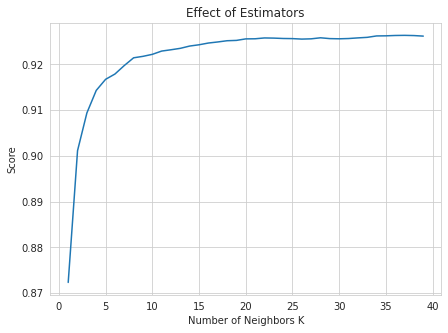

In [62]:
n_neighbors = np.arange(1, 40, 1)
scores = []
for n in n_neighbors:
  knn.set_params(n_neighbors = n)
  knn.fit(x_train, y_train)
  scores.append(knn.score(x_test, y_test))


plt.figure(figsize = (7, 5))
plt.title("Effect of Estimators")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Score")
plt.plot(n_neighbors, scores)

In [63]:
print("max accuracy is: ", max(scores))
print("K value to achieve this result: ", n_neighbors[scores.index(max(scores))])

max accuracy is:  0.9263334120934399
K value to achieve this result:  37


Decision Tree

In [64]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [65]:
accuracy = tree_reg.score(x_test, y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 87.14%'

Random Forest

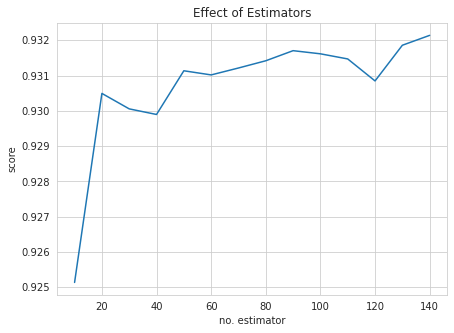

In [67]:
rf = RandomForestRegressor(n_jobs = -1)
estimators = np.arange(10, 150, 10)
scores = []
for n in estimators:
  rf.set_params(n_estimators = n)
  rf.fit(x_train, y_train)
  scores.append(rf.score(x_test, y_test))
plt.figure(figsize = (7, 5))
plt.title("Effect of Estimators")
plt.xlabel("no. estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [68]:
print("max accuracy is: ", max(scores))

max accuracy is:  0.9321384689914369


In [69]:
print("the number of estimators required to achieve this result: ", estimators[scores.index(max(scores))])

the number of estimators required to achieve this result:  140


K Means Clustering

In [70]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state = 0).fit(x_train)
kmeans.labels_
kmeans.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [71]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.62593751e+05  1.61441263e+04  3.60498353e+06  9.75607143e-01
   1.21732804e+00  5.39732804e+01  5.02645503e-03  7.01058201e-03
   4.10052910e-03  1.98412698e-02  3.86243386e-02  5.02645503e-03
   2.30158730e-02  1.90476190e-02  9.12698413e-03  8.86243386e-03
   5.15873016e-03  1.70767196e-01  2.80423280e-02  9.25925926e-03
   8.91534392e-02  2.46031746e-02  6.08465608e-03  7.27513228e-03
   3.04232804e-02  9.52380952e-03  4.11375661e-02  1.95767196e-02
   5.02645503e-03  3.22751323e-02  2.26190476e-02  2.77777778e-02
   2.11640212e-02  2.02380952e-02  2.84391534e-02  6.99735450e-02
   1.82539683e-02  1.15079365e-02  5.82010582e-03 -3.01785476e+03
   1.56216931e-01  7.77513228e-01  6.62698413e-02]
 [ 1.40060436e+07  5.41428571e+04  6.60714286e+08  0.00000000e+00
   1.75000000e+00  3.47500000e+01  1.73472348e-18  1.73472348e-18
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.73472348e-18
   1.07142857e-01 -3.46944695e-18  0.00000000e+00  0.00000000e+00
   1.73472348e-18  3.5714

DBSCAN

In [72]:
from sklearn.cluster import DBSCAN
import numpy as np
clustering = DBSCAN(eps = 3).fit(x_train)

In [73]:
clustering.labels_

array([-1,  0, -1, ..., -1, -1, -1])

In [74]:
clustering.fit_predict(x_test)

array([-1,  0, -1, ..., -1, -1, -1])

In [75]:
clustering.get_params(deep = True)

{'algorithm': 'auto',
 'eps': 3,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 5,
 'n_jobs': None,
 'p': None}